<a href="https://colab.research.google.com/github/MadsNL/AMLMain/blob/Flemming/AML_IceCores_best_tree_shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! gdown --id 1paSsYReykEVDPX8pA2SUf7Gr7Lptq-PX
! unzip Insoluables_TrainingData26May2022.zip
!git clone https://github.com/MadsNL/AMLpackages.git
import sys
sys.path.append('/content/AMLpackages/')
from load_data import training_set, not_training_set
!pip install pyyaml h5py 
!pip install umap-learn
!pip install shap
import shap

Streaming af output blev afkortet til de sidste 5000 linjer.
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5554.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5555.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5556.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5557.png  
 extracting: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5558.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5559.png  
 extracting: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_556.png  
 extracting: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5560.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5561.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5562.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5563.png  
  inflating: Ins

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import umap
import seaborn as sb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
!pip install scikit-optimize
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV

In [89]:
sup_path = '/content/Insoluables_TrainingData/train/'
sup_im_path = '/content/Insoluables_TrainingData/train/'
sup_df = pd.read_csv(sup_path+'train.csv')
sup = training_set(sup_df, sup_im_path)

sup_path = '/content/Insoluables_TrainingData/train/'
sup_im_path = '/content/Insoluables_TrainingData/train/'
sup_df = pd.read_csv(sup_path+'train.csv')
train_df, test_df = train_test_split(sup_df, test_size=0.2, random_state = 37)
train = training_set(train_df, sup_im_path)
test = training_set(test_df, sup_im_path)

In [90]:
#train.X_feature_names

In [91]:
train = sup_df
train

,Particle ID,Area (ABD),Area (Filled),Aspect Ratio,Biovolume (Cylinder),Biovolume (P. Spheroid),Biovolume (Sphere),Calibration Factor,Calibration Image,Camera,...,Volume (ESD),Width,imgpaths,camp,corylus,dust,grim,qrob,qsub,cont
0,1,41.72,41.72,0.70,283.50,164.42,202.72,0.2752,1,1,...,238.8423,6.12,Insoluables_TrainingData/train/campanian/camp_...,1,0,0,0,0,0,0
1,2,22.96,22.96,0.62,133.54,60.80,82.78,0.2752,1,1,...,105.6288,4.04,Insoluables_TrainingData/train/campanian/camp_...,1,0,0,0,0,0,0
2,3,396.76,402.93,0.36,3255.70,3685.72,5945.06,0.2752,1,1,...,12171.9000,14.29,Insoluables_TrainingData/train/campanian/camp_...,1,0,0,0,0,0,0
3,4,41.14,42.30,0.64,263.21,161.45,198.50,0.2752,1,1,...,292.0631,5.91,Insoluables_TrainingData/train/campanian/camp_...,1,0,0,0,0,0,0
4,5,23.83,23.83,0.64,143.20,65.85,87.50,0.2752,1,1,...,111.3132,4.28,Insoluables_TrainingData/train/campanian/camp_...,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147955,148067,97.60,97.60,0.70,768.68,645.60,725.38,0.2752,5,1,...,1016.6080,9.93,Insoluables_TrainingData/train/contamination/G...,0,0,0,0,0,0,1
147956,148164,39.33,40.75,0.92,260.21,191.71,185.56,0.2752,5,1,...,238.9125,7.14,Insoluables_TrainingData/train/contamination/G...,0,0,0,0,0,0,1
147957,150673,47.90,47.90,0.55,346.41,180.25,249.40,0.2752,5,1,...,364.2664,6.18,Insoluables_TrainingData/train/contamination/G...,0,0,0,0,0,0,1
147958,150818,58.57,58.57,0.48,351.15,238.48,337.15,0.2752,5,1,...,563.0384,6.70,Insoluables_TrainingData/train/contamination/G...,0,0,0,0,0,0,1


In [92]:
train.shape

(147960, 64)

In [93]:
#train.columns.tolist()

In [94]:
train_df = train
from tqdm import tqdm
class_temp = []
for i in tqdm(range(len(train_df))):
  if train_df.iloc[i]['camp'] == 1:
    class_temp.append(0)
  elif train_df.iloc[i]['corylus'] == 1:
    class_temp.append(1)
  elif train_df.iloc[i]['dust'] == 1:
    class_temp.append(2)
  elif train_df.iloc[i]['grim'] == 1:
    class_temp.append(3)
  elif train_df.iloc[i]['qrob'] == 1:
    class_temp.append(4)
  elif train_df.iloc[i]['qsub'] == 1:
    class_temp.append(5)
  else:
    class_temp.append(6)

train_df.drop(['camp', 'corylus', 'dust','grim','qrob','qsub', 'cont'], axis = 1, inplace = True) 
train_df['class'] = class_temp

100%|██████████| 147960/147960 [00:59<00:00, 2474.62it/s]


In [95]:
x_train, x_eval = train_test_split(train_df, test_size=0.05, shuffle=True)
y_train, y_eval = x_train.pop('class'), x_eval.pop('class')

In [96]:
cols_mva = ['Area (ABD)', 'Area (Filled)', 'Aspect Ratio', 'Biovolume (Cylinder)',
       'Biovolume (P. Spheroid)', 'Circle Fit',
       'Circularity', 'Circularity (Hu)', 'Compactness', 'Convex Perimeter',
       'Convexity', 'Diameter (ABD)', 'Diameter (ESD)', 'Edge Gradient',
       'Elongation', 'Feret Angle Max', 'Feret Angle Min', 'Fiber Curl',
       'Fiber Straightness', 'Geodesic Aspect Ratio', 'Geodesic Length',
       'Geodesic Thickness', 'Intensity', 'Length', 'Particles Per Chain',
       'Perimeter', 'Roughness', 'Sigma Intensity', 'Sum Intensity',
       'Symmetry', 'Transparency', 'Volume (ABD)', 'Volume (ESD)', 'Width']

drops = ([]) # 'Date', 'Image File', 'Time', 'Timestamp', 'imgpaths'
for name in x_train.columns.tolist():
  if cols_mva.count(name) == 0 and name != "class":
    drops.append(name)

x_train.drop(drops, inplace = True, axis = 1)
x_eval.drop(drops, inplace = True, axis = 1)

In [97]:
drops

['Particle ID',
 'Biovolume (Sphere)',
 'Calibration Factor',
 'Calibration Image',
 'Camera',
 'Capture X',
 'Capture Y',
 'Date',
 'Elapsed Time',
 'Filter Score',
 'Image File',
 'Image Height',
 'Image Width',
 'Image X',
 'Image Y',
 'Source Image',
 'Sphere Complement',
 'Sphere Count',
 'Sphere Unknown',
 'Sphere Volume',
 'Time',
 'Timestamp',
 'imgpaths']

In [99]:
lgb_model = lgb.LGBMClassifier(objective='multiclass')

Depth      = [1,3,5,7,10,15,20,25,30,35,40,45,50,100]
Learn_rate = [0.01, 0.05, 0.10, 0.2, 2.5, 0.3, 0.4, 0.5, 1]
Estimators = [10,40,70,100,150,200,250,275,300,325,350,400,500]
Leaves     = [1,3,5,7,10,15,20,25,30,35,40,45,50, 70,100,150,200,250,275,300,325,350,400,500]
ites = [1,3,5,7,10,15,20,25,30,35,40,45,50, 70,100,150,200,250,275,300,325,350,400,500]

parameters_Bayesian = {'max_depth'    :Depth,
                       'learning_rate':Learn_rate,
                       'n_estimators' :Estimators, 
                        }
                      #'num_leaves'   :Leaves,
BayesSearch = BayesSearchCV(lgb_model, 
                          parameters_Bayesian, 
                          cv=5, 
                          return_train_score=True, 
                          refit=True, 
                          n_iter=10
                         );


BayesSearch.fit(x_train, y_train);
BayesSearch_results = pd.DataFrame(BayesSearch.cv_results_);
print("BayesSearch_results: \tBest parameters: ", BayesSearch.best_params_, f", Best scores: {BayesSearch.best_score_:.4f}\n")

BayesSearch_results: 	Best parameters:  OrderedDict([('learning_rate', 0.2), ('max_depth', 5), ('n_estimators', 350)]) , Best scores: 0.8647



In [100]:
best_learn, best_depth, best_esti = BayesSearch.best_params_['learning_rate'], BayesSearch.best_params_['max_depth'], BayesSearch.best_params_['n_estimators']

In [ ]:
#lgb_model.fit(x_train, y_train)

In [101]:
tree = lgb.LGBMClassifier(objective='multiclass',
                         learning_rate = best_learn,
                          max_depth = best_depth,
                          n_estimators = best_esti,
                          ) #num_leaves = best_leaves
tree.fit(x_train, y_train)

LGBMClassifier(learning_rate=0.2, max_depth=5, n_estimators=350,
               objective='multiclass')

In [102]:
explainer = shap.Explainer(tree)  #shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

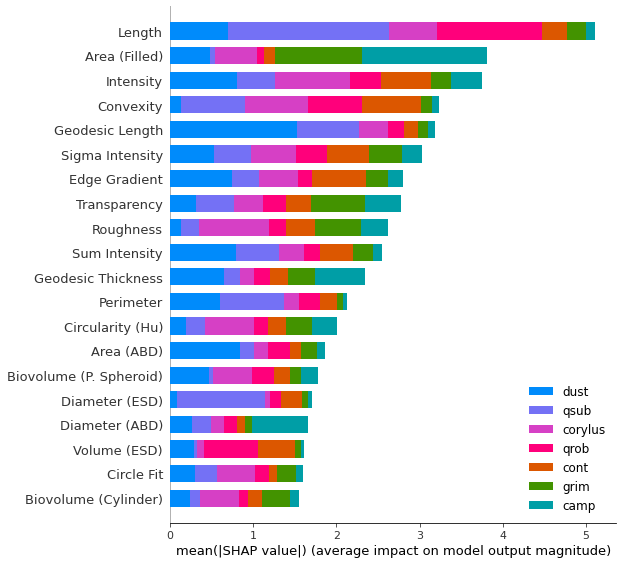

<Figure size 432x288 with 0 Axes>

In [103]:
feature_names = x_train.columns.tolist()
names = ['camp', 'corylus', 'dust','grim','qrob','qsub', 'cont']
plt.figure()
shap.summary_plot(shap_values, feature_names ,plot_type="bar", class_names=names)
plt.savefig('shap')

best_learn, best_depth, best_esti = 0.3, 15, 250

In [8]:
"""tree = lgb.LGBMClassifier(objective='multiclass',
                         learning_rate = best_learn,
                          max_depth = best_depth,
                          n_estimators = best_esti,
                          num_leaves = best_leaves)
"""



100000

In [10]:
import pickle
#pickle.dump(tree, open("tree_model_trained.pkl", "wb"))
tree = pickle.load(open("AMLpackages/tree_model_trained.pkl", "rb"))

ValueError: ignored

0.8642

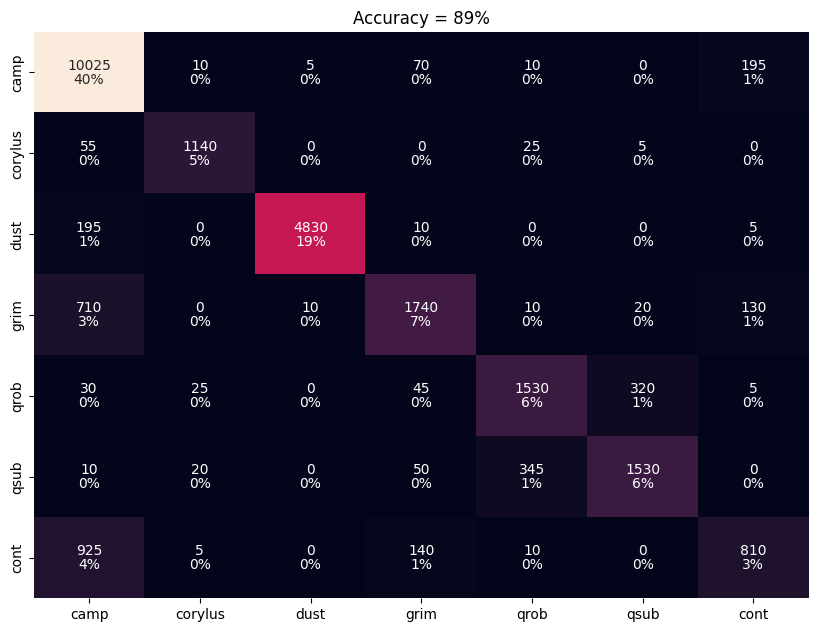